In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print(datetime.datetime.now())

2023-06-13 11:29:52.760026


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(-1447.2332)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 48


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(4.6900)tensor(6.1079)tensor(4.1276)tensor(4.1013)tensor(4.4906)tensor(2.5680)tensor(8.0446)tensor(3.2530)tensor(3.3295)tensor(3.4284)tensor(5.5379)tensor(3.0737)tensor(3.4741)tensor(7.8857)tensor(3.6484)tensor(3.9607)tensor(6.1841)tensor(2.9183)tensor(3.8949)tensor(4.3200)tensor(7.4749)tensor(4.2907)tensor(5.9571)tensor(5.1442)tensor(7.9371)tensor(7.2518)tensor(6.4385)tensor(6.4795)tensor(6.6592)tensor(7.8993)tensor(6.6127)tensor(6.7525)tensor(7.6070)tensor(6.9687)tensor(4.8691)tensor(4.2715)tensor(8.2019)tensor(7.0312)tensor(5.2863)tensor(5.8623)tensor(3.0883)tensor(5.3527)tensor(5.6772)tensor(4.3206)tensor(5.0136)tensor(4.6793)tensor(8.6648)tensor(10.1536)tensor(10.9895)tensor(7.2449)tensor(2.8375)tensor(4.2353)tensor(4.9647)tensor(4.3102)tensor(5.8498)tensor(5.7911)tensor(4.5322)tensor(4.4600)tensor(5.9349)tensor(7.2624)tensor(3.1342)tensor(4.8476)tensor(5.6634)tensor(7.2108)tensor(5.7909)tensor(3.6229)tensor(3.1749)tensor(3.4075)tensor(3.1937)tensor(6.2585)tensor(3.1958)tens

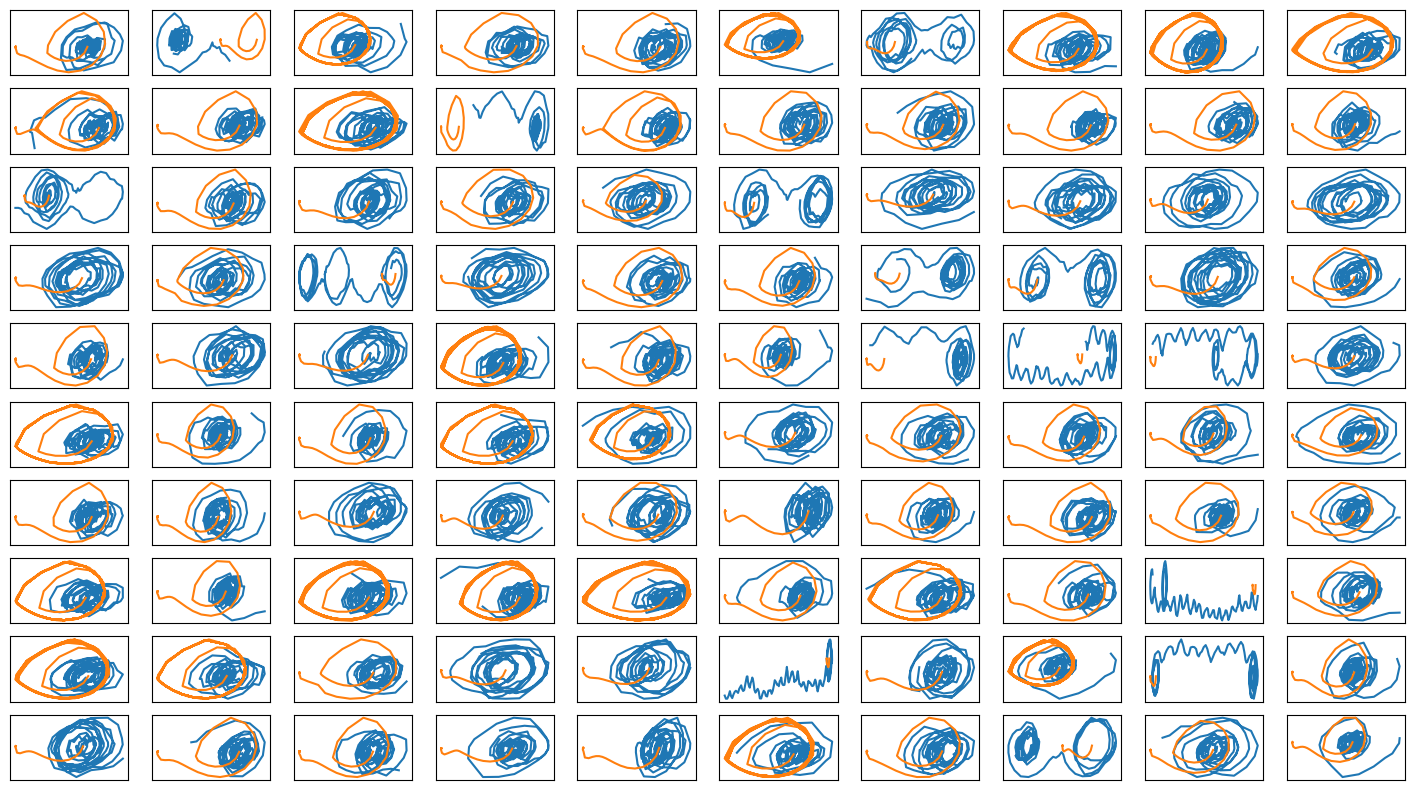

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 97016.65500  validloss 541.35449±0.00000  bestvalidloss 541.35449  last_update 0
train: iter 1  trainloss 966.42863  validloss 488.60713±0.00000  bestvalidloss 488.60713  last_update 0
train: iter 2  trainloss 778.76349  validloss 480.12335±0.00000  bestvalidloss 480.12335  last_update 0
train: iter 3  trainloss 679.89716  validloss 475.37803±0.00000  bestvalidloss 475.37803  last_update 0
train: iter 4  trainloss 628.30208  validloss 458.83767±0.00000  bestvalidloss 458.83767  last_update 0
train: iter 5  trainloss 598.66518  validloss 446.24420±0.00000  bestvalidloss 446.24420  last_update 0
train: iter 6  trainloss 553.48137  validloss 434.72458±0.00000  bestvalidloss 434.72458  last_update 0
train: iter 7  trainloss 530.18034  validloss 422.33199±0.00000  bestvalidloss 422.33199  last_update 0
train: iter 8  trainloss 512.94018  validloss 408.89548±0.00000  bestvalidloss 408.89548  last_update 0
train: iter 9  trainloss 524.33370  validlo

train: iter 79  trainloss -121.17192  validloss -173.80874±0.00000  bestvalidloss -175.59277  last_update 1
train: iter 80  trainloss -115.83621  validloss -178.84843±0.00000  bestvalidloss -178.84843  last_update 0
train: iter 81  trainloss -74.88752  validloss -191.55580±0.00000  bestvalidloss -191.55580  last_update 0
train: iter 82  trainloss -122.43475  validloss -156.26644±0.00000  bestvalidloss -191.55580  last_update 1
train: iter 83  trainloss -152.35392  validloss -215.25885±0.00000  bestvalidloss -215.25885  last_update 0
train: iter 84  trainloss -162.28999  validloss -261.31204±0.00000  bestvalidloss -261.31204  last_update 0
train: iter 85  trainloss -165.65242  validloss -230.76667±0.00000  bestvalidloss -261.31204  last_update 1
train: iter 86  trainloss -183.39642  validloss -277.99450±0.00000  bestvalidloss -277.99450  last_update 0
train: iter 87  trainloss -189.97756  validloss -206.54934±0.00000  bestvalidloss -277.99450  last_update 1
train: iter 88  trainloss -20

train: iter 155  trainloss -553.23496  validloss -582.87377±0.00000  bestvalidloss -616.06468  last_update 11
train: iter 156  trainloss -559.49629  validloss -588.47967±0.00000  bestvalidloss -616.06468  last_update 12
train: iter 157  trainloss -573.80294  validloss -605.70408±0.00000  bestvalidloss -616.06468  last_update 13
train: iter 158  trainloss -575.93889  validloss -623.22066±0.00000  bestvalidloss -623.22066  last_update 0
train: iter 159  trainloss -558.99778  validloss -626.37218±0.00000  bestvalidloss -626.37218  last_update 0
train: iter 160  trainloss -538.95579  validloss -602.04306±0.00000  bestvalidloss -626.37218  last_update 1
train: iter 161  trainloss -549.77814  validloss -613.48638±0.00000  bestvalidloss -626.37218  last_update 2
train: iter 162  trainloss -565.47375  validloss -639.28158±0.00000  bestvalidloss -639.28158  last_update 0
train: iter 163  trainloss -573.42167  validloss -619.03875±0.00000  bestvalidloss -639.28158  last_update 1
train: iter 164 

train: iter 230  trainloss -616.17591  validloss -654.42270±0.00000  bestvalidloss -683.76934  last_update 14
train: iter 231  trainloss -615.46092  validloss -620.02015±0.00000  bestvalidloss -683.76934  last_update 15
train: iter 232  trainloss -617.28527  validloss -668.83612±0.00000  bestvalidloss -683.76934  last_update 16
train: iter 233  trainloss -545.87287  validloss -681.78513±0.00000  bestvalidloss -683.76934  last_update 17
train: iter 234  trainloss -575.81932  validloss -542.52122±0.00000  bestvalidloss -683.76934  last_update 18
train: iter 235  trainloss -592.23418  validloss -597.26627±0.00000  bestvalidloss -683.76934  last_update 19
train: iter 236  trainloss -559.85063  validloss -602.37268±0.00000  bestvalidloss -683.76934  last_update 20
train: iter 237  trainloss -586.55961  validloss -640.12293±0.00000  bestvalidloss -683.76934  last_update 21
train: iter 238  trainloss -589.38402  validloss -611.67857±0.00000  bestvalidloss -683.76934  last_update 22
train: ite

train: iter 305  trainloss -615.78173  validloss -646.97629±0.00000  bestvalidloss -724.97078  last_update 33
train: iter 306  trainloss -633.37076  validloss -676.88419±0.00000  bestvalidloss -724.97078  last_update 34
train: iter 307  trainloss -640.36400  validloss -689.02752±0.00000  bestvalidloss -724.97078  last_update 35
train: iter 308  trainloss -652.69046  validloss -675.18821±0.00000  bestvalidloss -724.97078  last_update 36
train: iter 309  trainloss -648.02963  validloss -737.92485±0.00000  bestvalidloss -737.92485  last_update 0
train: iter 310  trainloss -641.92299  validloss -702.54925±0.00000  bestvalidloss -737.92485  last_update 1
train: iter 311  trainloss -645.71081  validloss -735.27522±0.00000  bestvalidloss -737.92485  last_update 2
train: iter 312  trainloss -577.65131  validloss -708.18273±0.00000  bestvalidloss -737.92485  last_update 3
train: iter 313  trainloss -622.29232  validloss -691.37429±0.00000  bestvalidloss -737.92485  last_update 4
train: iter 314

train: iter 381  trainloss -646.84599  validloss -730.20475±0.00000  bestvalidloss -742.28191  last_update 39
train: iter 382  trainloss -648.62338  validloss -678.90631±0.00000  bestvalidloss -742.28191  last_update 40
train: iter 383  trainloss -624.59289  validloss -689.42070±0.00000  bestvalidloss -742.28191  last_update 41
train: iter 384  trainloss -653.79788  validloss -703.36911±0.00000  bestvalidloss -742.28191  last_update 42
train: iter 385  trainloss -648.49916  validloss -714.78852±0.00000  bestvalidloss -742.28191  last_update 43
train: iter 386  trainloss -649.29416  validloss -734.58263±0.00000  bestvalidloss -742.28191  last_update 44
train: iter 387  trainloss -651.40298  validloss -734.56766±0.00000  bestvalidloss -742.28191  last_update 45
train: iter 388  trainloss -653.56881  validloss -722.32945±0.00000  bestvalidloss -742.28191  last_update 46
train: iter 389  trainloss -644.29673  validloss -697.87781±0.00000  bestvalidloss -742.28191  last_update 47
train: ite

train: iter 456  trainloss -657.90607  validloss -731.58618±0.00000  bestvalidloss -754.78534  last_update 61
train: iter 457  trainloss -664.97929  validloss -626.25357±0.00000  bestvalidloss -754.78534  last_update 62
train: iter 458  trainloss -664.35306  validloss -768.59543±0.00000  bestvalidloss -768.59543  last_update 0
train: iter 459  trainloss -683.55065  validloss -740.33223±0.00000  bestvalidloss -768.59543  last_update 1
train: iter 460  trainloss -673.07074  validloss -736.25834±0.00000  bestvalidloss -768.59543  last_update 2
train: iter 461  trainloss -669.71268  validloss -739.23928±0.00000  bestvalidloss -768.59543  last_update 3
train: iter 462  trainloss -660.93823  validloss -729.93669±0.00000  bestvalidloss -768.59543  last_update 4
train: iter 463  trainloss -667.14783  validloss -681.13959±0.00000  bestvalidloss -768.59543  last_update 5
train: iter 464  trainloss -681.92855  validloss -729.24550±0.00000  bestvalidloss -768.59543  last_update 6
train: iter 465  

train: iter 531  trainloss -662.70733  validloss -756.05535±0.00000  bestvalidloss -770.64320  last_update 31
train: iter 532  trainloss -650.22256  validloss -700.08066±0.00000  bestvalidloss -770.64320  last_update 32
train: iter 533  trainloss -664.35311  validloss -724.75988±0.00000  bestvalidloss -770.64320  last_update 33
train: iter 534  trainloss -666.02057  validloss -746.89108±0.00000  bestvalidloss -770.64320  last_update 34
train: iter 535  trainloss -661.07991  validloss -707.85978±0.00000  bestvalidloss -770.64320  last_update 35
train: iter 536  trainloss -663.22433  validloss -756.78495±0.00000  bestvalidloss -770.64320  last_update 36
train: iter 537  trainloss -654.07704  validloss -657.96399±0.00000  bestvalidloss -770.64320  last_update 37
train: iter 538  trainloss -672.28273  validloss -765.64577±0.00000  bestvalidloss -770.64320  last_update 38
train: iter 539  trainloss -676.97731  validloss -742.83983±0.00000  bestvalidloss -770.64320  last_update 39
train: ite

train: iter 606  trainloss -660.58974  validloss -774.33194±0.00000  bestvalidloss -778.76198  last_update 59
train: iter 607  trainloss -678.70681  validloss -760.13376±0.00000  bestvalidloss -778.76198  last_update 60
train: iter 608  trainloss -676.90017  validloss -768.45867±0.00000  bestvalidloss -778.76198  last_update 61
train: iter 609  trainloss -684.42704  validloss -783.20361±0.00000  bestvalidloss -783.20361  last_update 0
train: iter 610  trainloss -685.48767  validloss -759.96244±0.00000  bestvalidloss -783.20361  last_update 1
train: iter 611  trainloss -660.58858  validloss -643.65790±0.00000  bestvalidloss -783.20361  last_update 2
train: iter 612  trainloss -677.12914  validloss -760.16645±0.00000  bestvalidloss -783.20361  last_update 3
train: iter 613  trainloss -699.37130  validloss -747.77538±0.00000  bestvalidloss -783.20361  last_update 4
train: iter 614  trainloss -687.74751  validloss -773.90437±0.00000  bestvalidloss -783.20361  last_update 5
train: iter 615 

train: iter 681  trainloss -706.86910  validloss -773.96078±0.00000  bestvalidloss -796.18021  last_update 28
train: iter 682  trainloss -705.44603  validloss -795.37522±0.00000  bestvalidloss -796.18021  last_update 29
train: iter 683  trainloss -704.14315  validloss -771.36406±0.00000  bestvalidloss -796.18021  last_update 30
train: iter 684  trainloss -706.49473  validloss -786.72473±0.00000  bestvalidloss -796.18021  last_update 31
train: iter 685  trainloss -707.50494  validloss -809.04087±0.00000  bestvalidloss -809.04087  last_update 0
train: iter 686  trainloss -713.04129  validloss -771.10624±0.00000  bestvalidloss -809.04087  last_update 1
train: iter 687  trainloss -706.73379  validloss -769.35318±0.00000  bestvalidloss -809.04087  last_update 2
train: iter 688  trainloss -716.51370  validloss -807.40518±0.00000  bestvalidloss -809.04087  last_update 3
train: iter 689  trainloss -692.72216  validloss -808.33019±0.00000  bestvalidloss -809.04087  last_update 4
train: iter 690

train: iter 757  trainloss -761.10286  validloss -836.22417±0.00000  bestvalidloss -845.89923  last_update 2
train: iter 758  trainloss -754.58824  validloss -855.55173±0.00000  bestvalidloss -855.55173  last_update 0
train: iter 759  trainloss -766.66478  validloss -815.12291±0.00000  bestvalidloss -855.55173  last_update 1
train: iter 760  trainloss -771.44768  validloss -846.83293±0.00000  bestvalidloss -855.55173  last_update 2
train: iter 761  trainloss -716.98622  validloss -816.40013±0.00000  bestvalidloss -855.55173  last_update 3
train: iter 762  trainloss -767.93099  validloss -818.97014±0.00000  bestvalidloss -855.55173  last_update 4
train: iter 763  trainloss -758.69524  validloss -842.49178±0.00000  bestvalidloss -855.55173  last_update 5
train: iter 764  trainloss -771.61467  validloss -808.02708±0.00000  bestvalidloss -855.55173  last_update 6
train: iter 765  trainloss -745.34956  validloss -848.01451±0.00000  bestvalidloss -855.55173  last_update 7
train: iter 766  tr

train: iter 832  trainloss -783.59212  validloss -797.39634±0.00000  bestvalidloss -863.70202  last_update 14
train: iter 833  trainloss -779.40672  validloss -816.81789±0.00000  bestvalidloss -863.70202  last_update 15
train: iter 834  trainloss -785.95939  validloss -803.45227±0.00000  bestvalidloss -863.70202  last_update 16
train: iter 835  trainloss -770.05078  validloss -826.40014±0.00000  bestvalidloss -863.70202  last_update 17
train: iter 836  trainloss -714.96943  validloss -806.02613±0.00000  bestvalidloss -863.70202  last_update 18
train: iter 837  trainloss -779.96336  validloss -836.02803±0.00000  bestvalidloss -863.70202  last_update 19
train: iter 838  trainloss -799.53420  validloss -798.17364±0.00000  bestvalidloss -863.70202  last_update 20
train: iter 839  trainloss -805.06006  validloss -832.01152±0.00000  bestvalidloss -863.70202  last_update 21
train: iter 840  trainloss -787.81238  validloss -829.74458±0.00000  bestvalidloss -863.70202  last_update 22
train: ite

train: iter 907  trainloss -802.75710  validloss -744.03703±0.00000  bestvalidloss -863.70202  last_update 89
train: iter 908  trainloss -815.74939  validloss -792.89912±0.00000  bestvalidloss -863.70202  last_update 90
train: iter 909  trainloss -809.99014  validloss -808.41733±0.00000  bestvalidloss -863.70202  last_update 91
train: iter 910  trainloss -797.31526  validloss -833.98614±0.00000  bestvalidloss -863.70202  last_update 92
train: iter 911  trainloss -744.37287  validloss -578.04630±0.00000  bestvalidloss -863.70202  last_update 93
train: iter 912  trainloss -822.60734  validloss -846.05145±0.00000  bestvalidloss -863.70202  last_update 94
train: iter 913  trainloss -838.09494  validloss -824.33593±0.00000  bestvalidloss -863.70202  last_update 95
train: iter 914  trainloss -810.97860  validloss -777.82366±0.00000  bestvalidloss -863.70202  last_update 96
train: iter 915  trainloss -802.78555  validloss -772.59356±0.00000  bestvalidloss -863.70202  last_update 97
train: ite

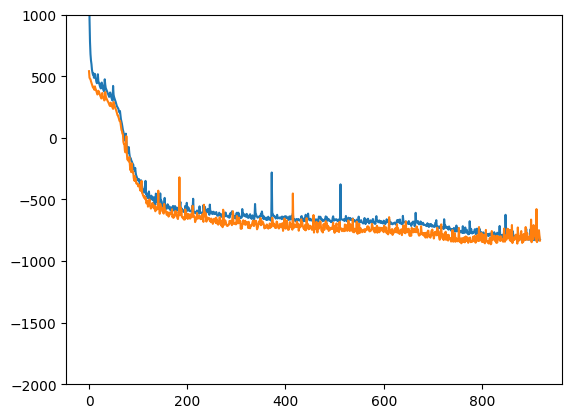

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  predict diverge [32.37613795 37.23340325] [2.94519044 7.45439313] [226.49232  30.     ] [113.24616  15.     ] sim_timestep 30
37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  

実環境方策rollout vs Sim環境方策rollout


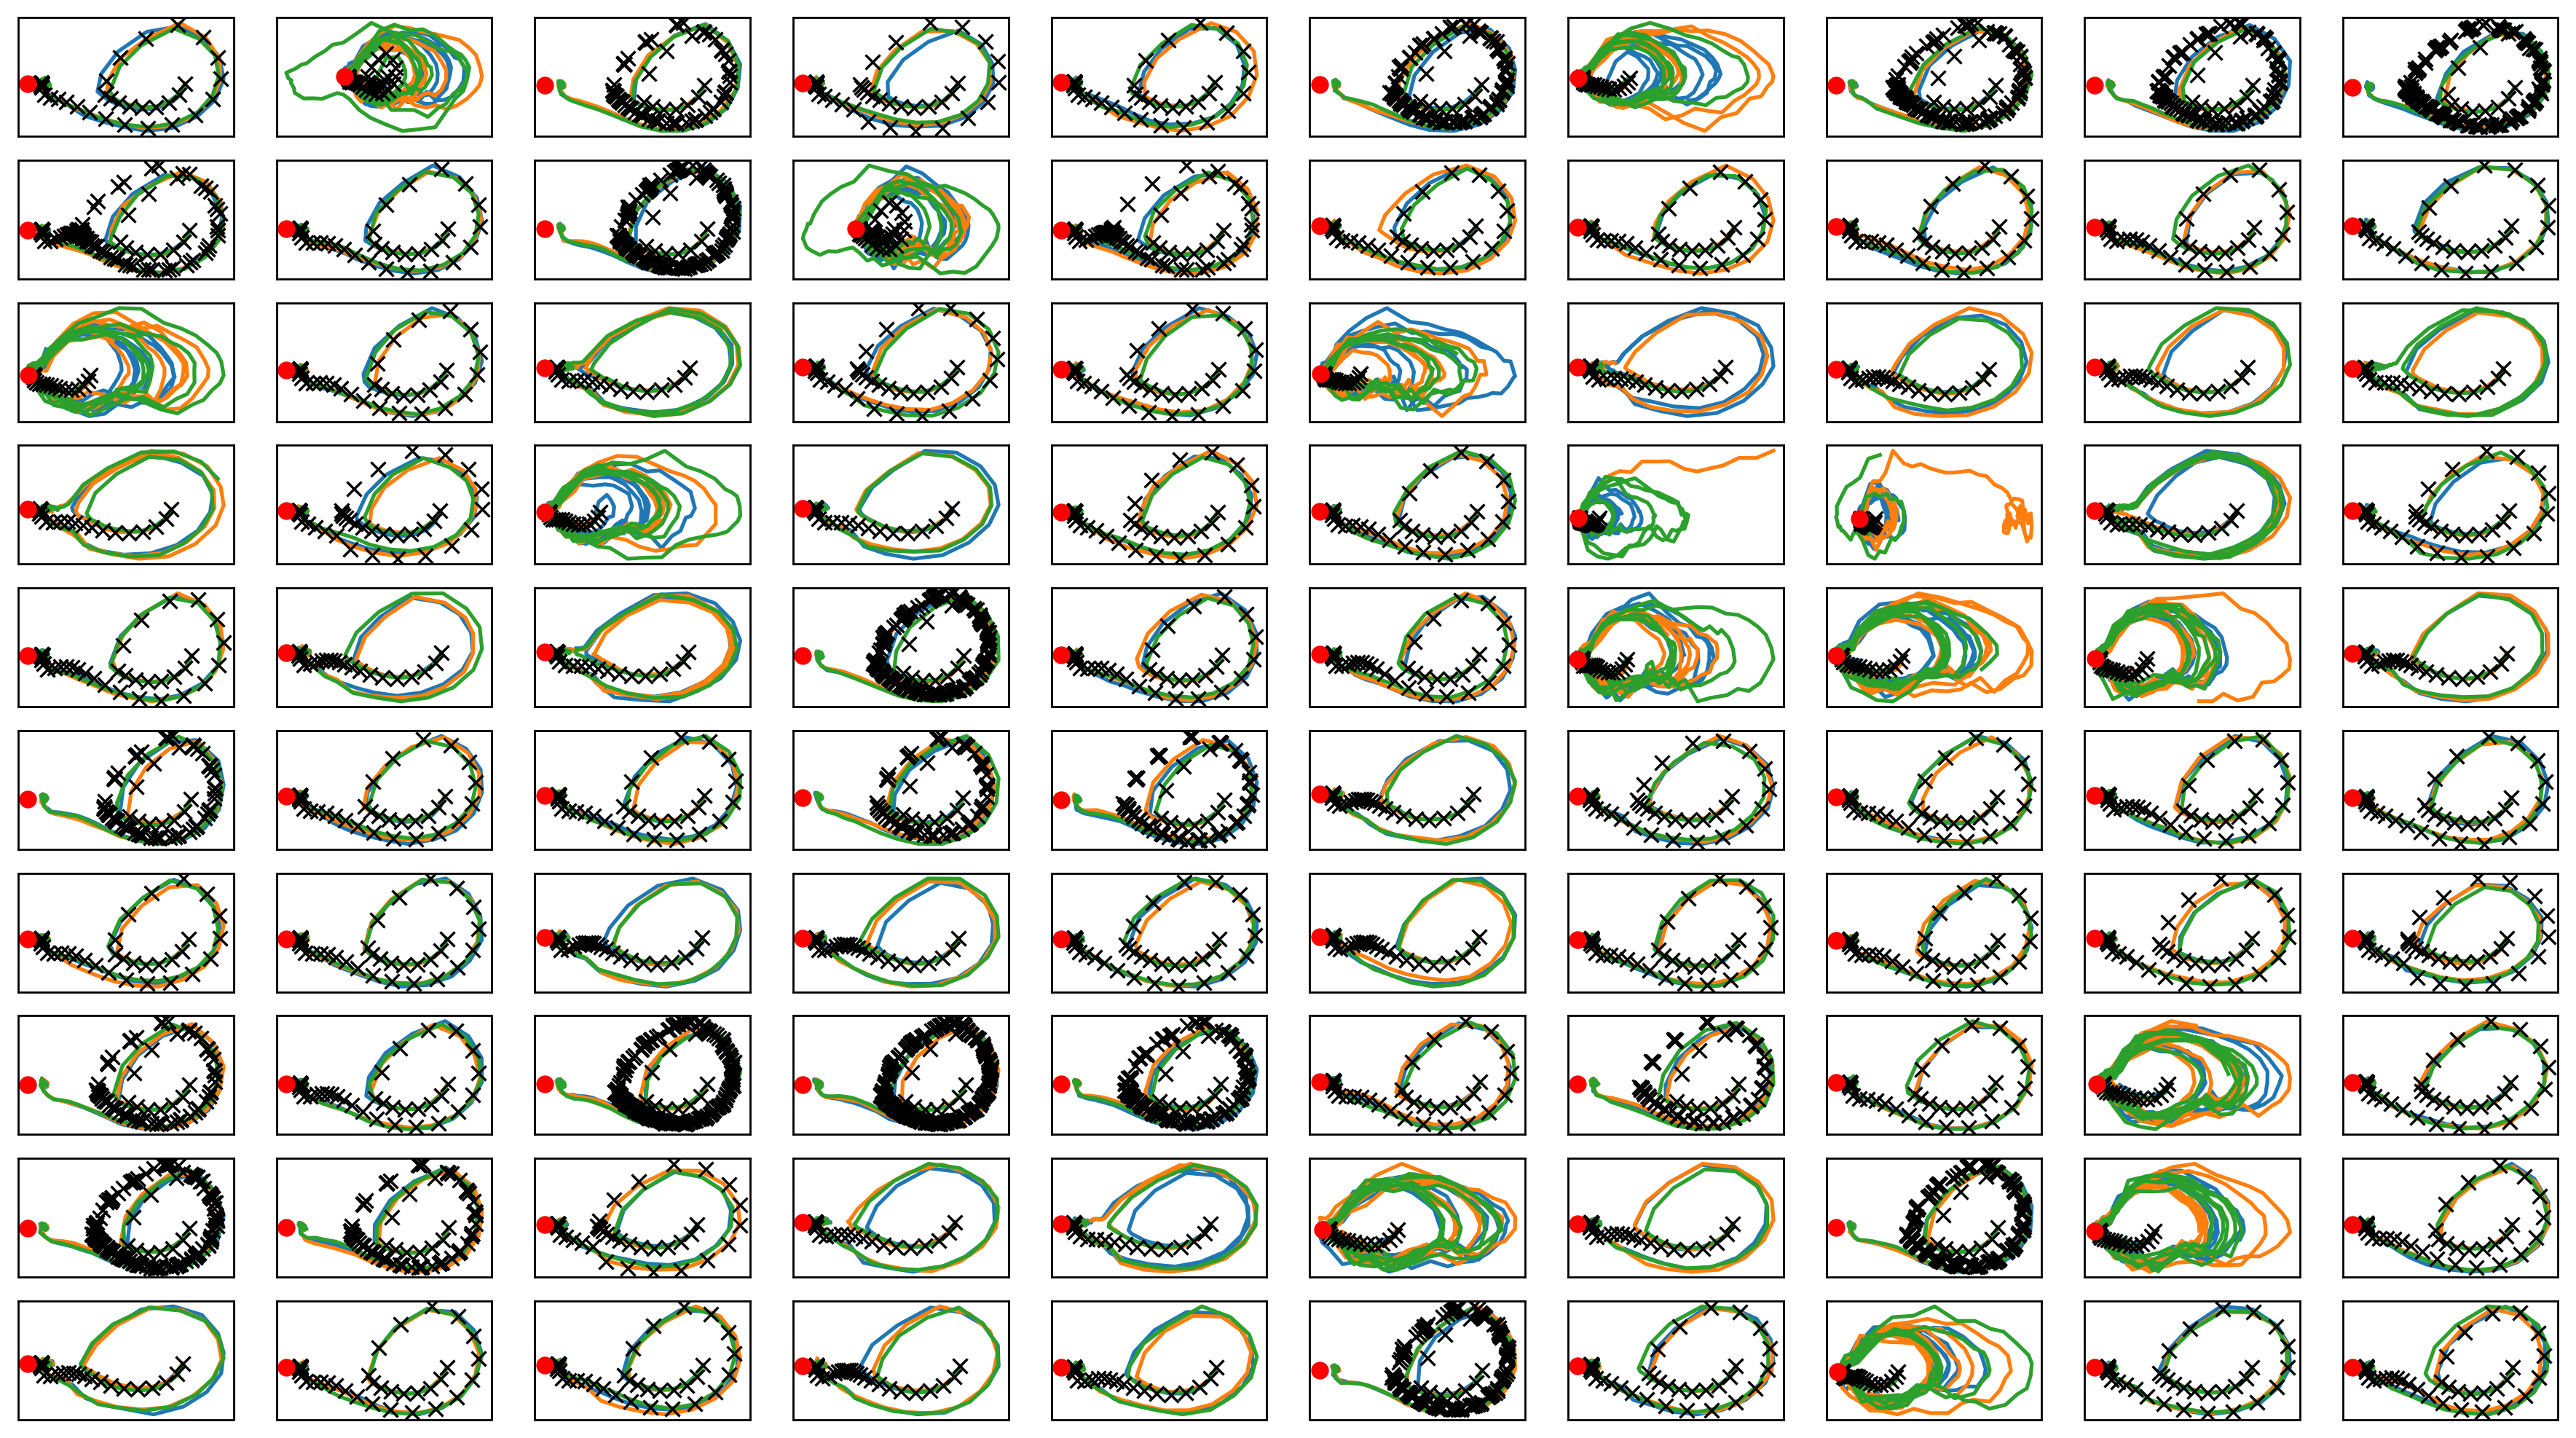

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

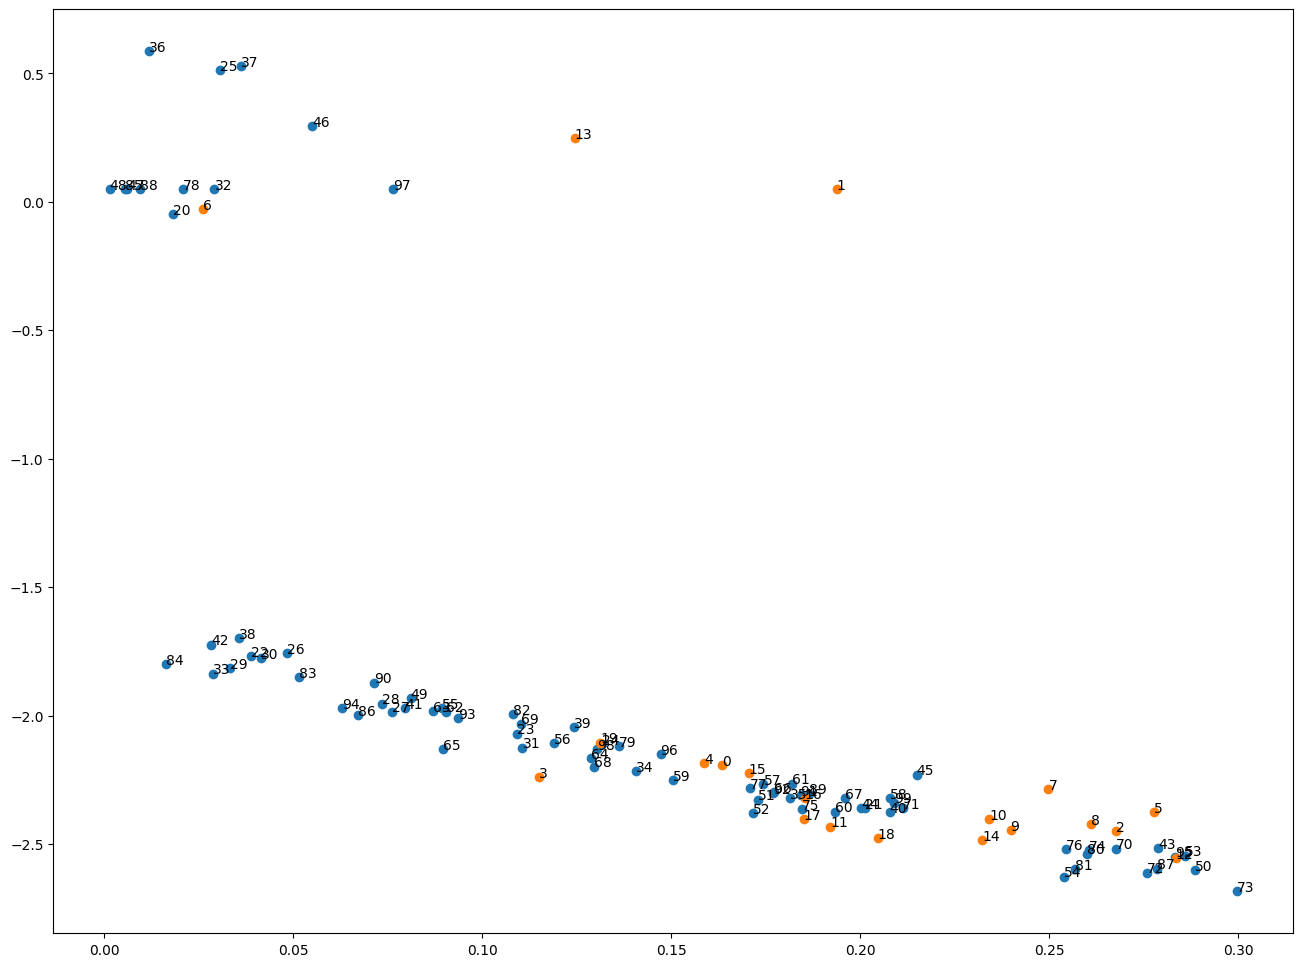

[0.16346495 0.19376823 0.2675319  0.11503246 0.15866848 0.27767899
 0.02613879 0.24978595 0.26100364 0.23974757 0.23415875 0.19197631
 0.28340068 0.12439858 0.23227011 0.17053018 0.18529065 0.1850802
 0.20454609 0.13110959 0.01806764 0.20119136 0.03867789 0.10911323
 0.13158045 0.03061344 0.04839286 0.07598748 0.07332768 0.03311254
 0.04145489 0.11061755 0.02913038 0.02882952 0.14059536 0.18145366
 0.01175634 0.03605897 0.03561832 0.1242789  0.20774164 0.07961685
 0.02818215 0.27878886 0.20022311 0.21489816 0.05495741 0.00603226
 0.00140864 0.08100239 0.28865656 0.1728472  0.17167557 0.2858247
 0.2539226  0.08923109 0.11895172 0.17438186 0.20775948 0.15039731
 0.19319706 0.18191796 0.09047245 0.08702328 0.12863061 0.0894847
 0.17726183 0.19596025 0.12942553 0.11026856 0.26757701 0.21116658
 0.27584478 0.2996541  0.26043782 0.18466787 0.25440247 0.17073022
 0.0207501  0.1360628  0.2599147  0.256741   0.10799342 0.0514889
 0.0163014  0.00555654 0.06717741 0.27842439 0.00955168 0.18644352

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


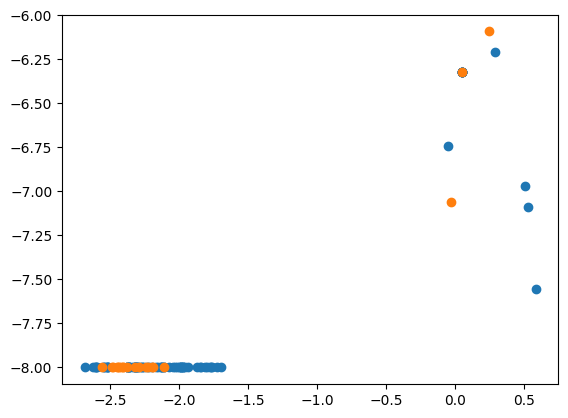

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 2.89124  validloss 3.27923±0.00000  bestvalidloss 3.27923  last_update 0
train: iter 1  trainloss 2.69293  validloss 3.02035±0.00000  bestvalidloss 3.02035  last_update 0
train: iter 2  trainloss 2.53167  validloss 2.81465±0.00000  bestvalidloss 2.81465  last_update 0
train: iter 3  trainloss 2.39529  validloss 2.65900±0.00000  bestvalidloss 2.65900  last_update 0
train: iter 4  trainloss 2.28345  validloss 2.51334±0.00000  bestvalidloss 2.51334  last_update 0
train: iter 5  trainloss 2.18734  validloss 2.40432±0.00000  bestvalidloss 2.40432  last_update 0
train: iter 6  trainloss 2.10718  validloss 2.30863±0.00000  bestvalidloss 2.30863  last_update 0
train: iter 7  trainloss 2.04120  validloss 2.21059±0.00000  bestvalidloss 2.21059  last_update 0
train: iter 8  trainloss 1.97797  validloss 2.14701±0.00000  bestvalidloss 2.14701  last_update 0
train: iter 9  trainloss 1.93034  validloss 2.09085±0.00000  bestvalidloss 2.09085  last_update 0
train: iter 10  trai

train: iter 83  trainloss 1.29826  validloss 1.29631±0.00000  bestvalidloss 1.29227  last_update 14
train: iter 84  trainloss 1.30707  validloss 1.31452±0.00000  bestvalidloss 1.29227  last_update 15
train: iter 85  trainloss 1.29757  validloss 1.29836±0.00000  bestvalidloss 1.29227  last_update 16
train: iter 86  trainloss 1.29403  validloss 1.29314±0.00000  bestvalidloss 1.29227  last_update 17
train: iter 87  trainloss 1.30265  validloss 1.31544±0.00000  bestvalidloss 1.29227  last_update 18
train: iter 88  trainloss 1.29704  validloss 1.29684±0.00000  bestvalidloss 1.29227  last_update 19
train: iter 89  trainloss 1.29770  validloss 1.31297±0.00000  bestvalidloss 1.29227  last_update 20
train: iter 90  trainloss 1.29641  validloss 1.31090±0.00000  bestvalidloss 1.29227  last_update 21
train: iter 91  trainloss 1.30303  validloss 1.29829±0.00000  bestvalidloss 1.29227  last_update 22
train: iter 92  trainloss 1.30811  validloss 1.31329±0.00000  bestvalidloss 1.29227  last_update 23


train: iter 170  trainloss 1.29907  validloss 1.30402±0.00000  bestvalidloss 1.28621  last_update 43
train: iter 171  trainloss 1.29897  validloss 1.30176±0.00000  bestvalidloss 1.28621  last_update 44
train: iter 172  trainloss 1.29388  validloss 1.30241±0.00000  bestvalidloss 1.28621  last_update 45
train: iter 173  trainloss 1.29908  validloss 1.29408±0.00000  bestvalidloss 1.28621  last_update 46
train: iter 174  trainloss 1.29923  validloss 1.31435±0.00000  bestvalidloss 1.28621  last_update 47
train: iter 175  trainloss 1.30033  validloss 1.29413±0.00000  bestvalidloss 1.28621  last_update 48
train: iter 176  trainloss 1.29480  validloss 1.30266±0.00000  bestvalidloss 1.28621  last_update 49
train: iter 177  trainloss 1.29974  validloss 1.32288±0.00000  bestvalidloss 1.28621  last_update 50
train: iter 178  trainloss 1.30660  validloss 1.30826±0.00000  bestvalidloss 1.28621  last_update 51
train: iter 179  trainloss 1.29524  validloss 1.31537±0.00000  bestvalidloss 1.28621  last_

train: iter 254  trainloss 1.29815  validloss 1.29484±0.00000  bestvalidloss 1.27568  last_update 54
train: iter 255  trainloss 1.30408  validloss 1.30785±0.00000  bestvalidloss 1.27568  last_update 55
train: iter 256  trainloss 1.30126  validloss 1.31389±0.00000  bestvalidloss 1.27568  last_update 56
train: iter 257  trainloss 1.30260  validloss 1.30438±0.00000  bestvalidloss 1.27568  last_update 57
train: iter 258  trainloss 1.29901  validloss 1.30019±0.00000  bestvalidloss 1.27568  last_update 58
train: iter 259  trainloss 1.30026  validloss 1.30244±0.00000  bestvalidloss 1.27568  last_update 59
train: iter 260  trainloss 1.30209  validloss 1.31229±0.00000  bestvalidloss 1.27568  last_update 60
train: iter 261  trainloss 1.30073  validloss 1.30616±0.00000  bestvalidloss 1.27568  last_update 61
train: iter 262  trainloss 1.30119  validloss 1.30308±0.00000  bestvalidloss 1.27568  last_update 62
train: iter 263  trainloss 1.29428  validloss 1.31436±0.00000  bestvalidloss 1.27568  last_

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([-1.8381, -0.2385], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 19.81760  validloss 23.95098±0.00000  bestvalidloss 23.95098  last_update 0
train: iter 1  trainloss 12.25796  validloss 14.55415±0.00000  bestvalidloss 14.55415  last_update 0
train: iter 2  trainloss 8.14896  validloss 8.49005±0.00000  bestvalidloss 8.49005  last_update 0
train: iter 3  trainloss 6.52210  validloss 6.17853±0.00000  bestvalidloss 6.17853  last_update 0
train: iter 4  trainloss 6.01604  validloss 5.12580±0.00000  bestvalidloss 5.12580  last_update 0
train: iter 5  trainloss 5.35521  validloss 4.39650±0.00000  bestvalidloss 4.39650  last_update 0
train: iter 6  trainloss 4.49158  validloss 3.64206±0.00000  bestvalidloss 3.64206  last_update 0
train: iter 7  trainloss 4.00302  validloss 3.05578±0.00000  bestvalidloss 3.05578  last_update 0
train: iter 8  trainloss 3.54900  validloss 2.46056±0.00000  bestvalidloss 2.46056  last_update 0
train: iter 9  trainloss 3.50752  validloss 2.10685±0.00000  bestvalidloss 2.10685  last_update 0
train: iter 10

train: iter 84  trainloss 2.39479  validloss 1.47435±0.00000  bestvalidloss 1.32822  last_update 10
train: iter 85  trainloss 2.73460  validloss 1.68489±0.00000  bestvalidloss 1.32822  last_update 11
train: iter 86  trainloss 2.53184  validloss 1.36406±0.00000  bestvalidloss 1.32822  last_update 12
train: iter 87  trainloss 2.82178  validloss 1.62659±0.00000  bestvalidloss 1.32822  last_update 13
train: iter 88  trainloss 2.87166  validloss 1.33103±0.00000  bestvalidloss 1.32822  last_update 14
train: iter 89  trainloss 2.49321  validloss 1.64599±0.00000  bestvalidloss 1.32822  last_update 15
train: iter 90  trainloss 2.66983  validloss 1.40027±0.00000  bestvalidloss 1.32822  last_update 16
train: iter 91  trainloss 2.66503  validloss 1.42601±0.00000  bestvalidloss 1.32822  last_update 17
train: iter 92  trainloss 2.62724  validloss 1.43064±0.00000  bestvalidloss 1.32822  last_update 18
train: iter 93  trainloss 2.51195  validloss 1.36202±0.00000  bestvalidloss 1.32822  last_update 19


train: iter 166  trainloss 2.80335  validloss 1.61378±0.00000  bestvalidloss 1.28363  last_update 21
train: iter 167  trainloss 2.43747  validloss 1.46654±0.00000  bestvalidloss 1.28363  last_update 22
train: iter 168  trainloss 2.55884  validloss 1.49847±0.00000  bestvalidloss 1.28363  last_update 23
train: iter 169  trainloss 2.53909  validloss 1.39662±0.00000  bestvalidloss 1.28363  last_update 24
train: iter 170  trainloss 2.45358  validloss 1.39689±0.00000  bestvalidloss 1.28363  last_update 25
train: iter 171  trainloss 2.71885  validloss 1.58943±0.00000  bestvalidloss 1.28363  last_update 26
train: iter 172  trainloss 2.58675  validloss 1.54489±0.00000  bestvalidloss 1.28363  last_update 27
train: iter 173  trainloss 2.92822  validloss 1.47128±0.00000  bestvalidloss 1.28363  last_update 28
train: iter 174  trainloss 2.90303  validloss 1.46354±0.00000  bestvalidloss 1.28363  last_update 29
train: iter 175  trainloss 2.63433  validloss 1.44346±0.00000  bestvalidloss 1.28363  last_

train: iter 249  trainloss 2.76354  validloss 1.38176±0.00000  bestvalidloss 1.26066  last_update 48
train: iter 250  trainloss 2.39580  validloss 1.47440±0.00000  bestvalidloss 1.26066  last_update 49
train: iter 251  trainloss 2.66682  validloss 1.41798±0.00000  bestvalidloss 1.26066  last_update 50
train: iter 252  trainloss 2.48743  validloss 1.33437±0.00000  bestvalidloss 1.26066  last_update 51
train: iter 253  trainloss 2.51217  validloss 1.38990±0.00000  bestvalidloss 1.26066  last_update 52
train: iter 254  trainloss 2.44727  validloss 1.43891±0.00000  bestvalidloss 1.26066  last_update 53
train: iter 255  trainloss 2.50911  validloss 1.46417±0.00000  bestvalidloss 1.26066  last_update 54
train: iter 256  trainloss 2.75109  validloss 1.47742±0.00000  bestvalidloss 1.26066  last_update 55
train: iter 257  trainloss 2.49061  validloss 1.36092±0.00000  bestvalidloss 1.26066  last_update 56
train: iter 258  trainloss 2.39833  validloss 1.55562±0.00000  bestvalidloss 1.26066  last_

train: iter 331  trainloss 2.99089  validloss 1.40646±0.00000  bestvalidloss 1.24101  last_update 58
train: iter 332  trainloss 2.41600  validloss 1.52725±0.00000  bestvalidloss 1.24101  last_update 59
train: iter 333  trainloss 2.67902  validloss 1.43565±0.00000  bestvalidloss 1.24101  last_update 60
train: iter 334  trainloss 2.38146  validloss 1.45712±0.00000  bestvalidloss 1.24101  last_update 61
train: iter 335  trainloss 2.55053  validloss 1.42873±0.00000  bestvalidloss 1.24101  last_update 62
train: iter 336  trainloss 2.69032  validloss 1.46803±0.00000  bestvalidloss 1.24101  last_update 63
train: iter 337  trainloss 2.38992  validloss 1.54702±0.00000  bestvalidloss 1.24101  last_update 64
train: iter 338  trainloss 2.91089  validloss 1.35646±0.00000  bestvalidloss 1.24101  last_update 65
train: iter 339  trainloss 2.76228  validloss 1.37030±0.00000  bestvalidloss 1.24101  last_update 66
train: iter 340  trainloss 2.70649  validloss 1.44728±0.00000  bestvalidloss 1.24101  last_

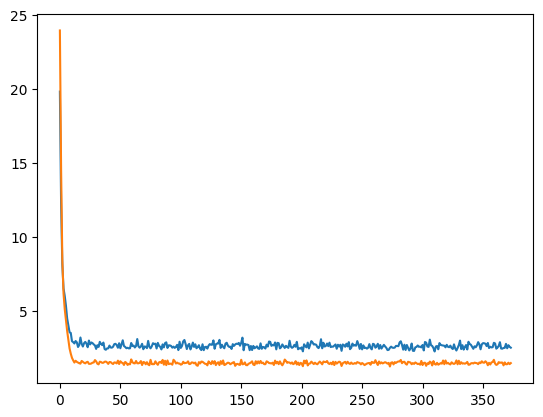

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(-2.0765)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(4.8749)


In [21]:
print(vi.h_min_tilde)

-6.161836


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-0.3834205427691884
tensor([0.5385])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

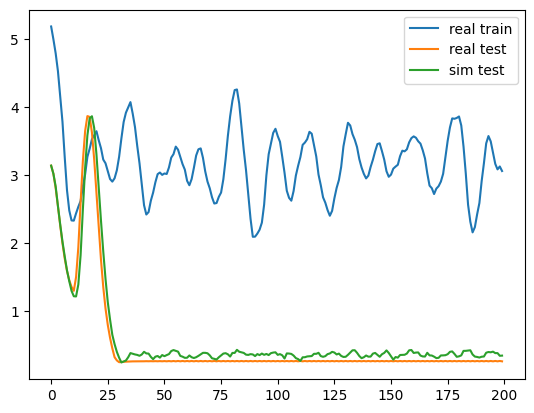

encoder [-2.1057916 -8.       ]
initial_belief tensor([-1.8381, -0.2385])
real train tensor([-2.1112, -8.0019])
real test tensor([-0.0432, -6.7486])
sim tensor([-2.1116, -8.0000])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-2.0612244897959187


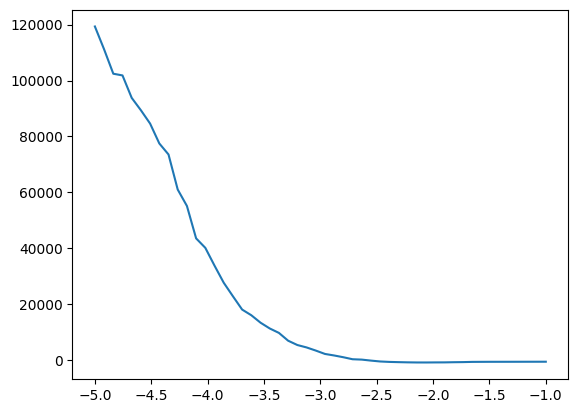

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-1.6688220436668397
tensor([-1.2660])
